<a href="https://colab.research.google.com/github/AbderBouni/Colab-Notebooks/blob/main/Copie_de_Thyroid_Disease_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [** **Thyroid Disease Detection Project** **](https://www.openml.org/search?type=data&status=active&id=38)

Thyroid Disease Detection Project, which we can use to detect the thyroid disease of an individual, based on a number of features.
dataset from openml :
https://www.openml.org/search?type=data&status=active&id=38

# Setup

In [ ]:
import pandas as pd
import sklearn
import numpy as np
# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Get the Data

## Download the Data from Github

In [ ]:
#let's import the data
url = "https://raw.githubusercontent.com/AbderBouni/Colab-Notebooks/main/csv_result-dataset_38_sick.csv"
dataset = pd.read_csv(url,sep=',',encoding='latin1', na_values={"?","%"})


## Take a Quick Look at the Data Structure

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) #to show all collumns
print(dataset.shape)
dataset.head(20)


(3775, 31)


,id,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,1,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,2,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,3,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,4,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,5,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative
5,6,18.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,NaN,t,183.0,t,1.30,t,141.0,f,NaN,other,negative
6,7,59.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,t,72.0,t,0.92,t,78.0,f,NaN,other,negative
7,8,80.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.20,t,0.6,t,80.0,t,0.70,t,115.0,f,NaN,SVI,sick
8,9,66.0,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,0.60,t,2.2,t,123.0,t,0.93,t,132.0,f,NaN,SVI,negative
9,10,68.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.40,t,1.6,t,83.0,t,0.89,t,93.0,f,NaN,SVI,negative


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3775 entries, 0 to 3774
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3775 non-null   int64  
 1   age                        3771 non-null   float64
 2   sex                        3622 non-null   object 
 3   on_thyroxine               3772 non-null   object 
 4   query_on_thyroxine         3772 non-null   object 
 5   on_antithyroid_medication  3772 non-null   object 
 6   sick                       3772 non-null   object 
 7   pregnant                   3772 non-null   object 
 8   thyroid_surgery            3772 non-null   object 
 9   I131_treatment             3772 non-null   object 
 10  query_hypothyroid          3772 non-null   object 
 11  query_hyperthyroid         3772 non-null   object 
 12  lithium                    3772 non-null   object 
 13  goitre                     3772 non-null   objec

In [ ]:
# Remove column 'id'
dataset= dataset.drop('id',axis=1)
print(dataset.shape)
print(dataset.dtypes)
dataset.head()

(3775, 30)
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured               

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


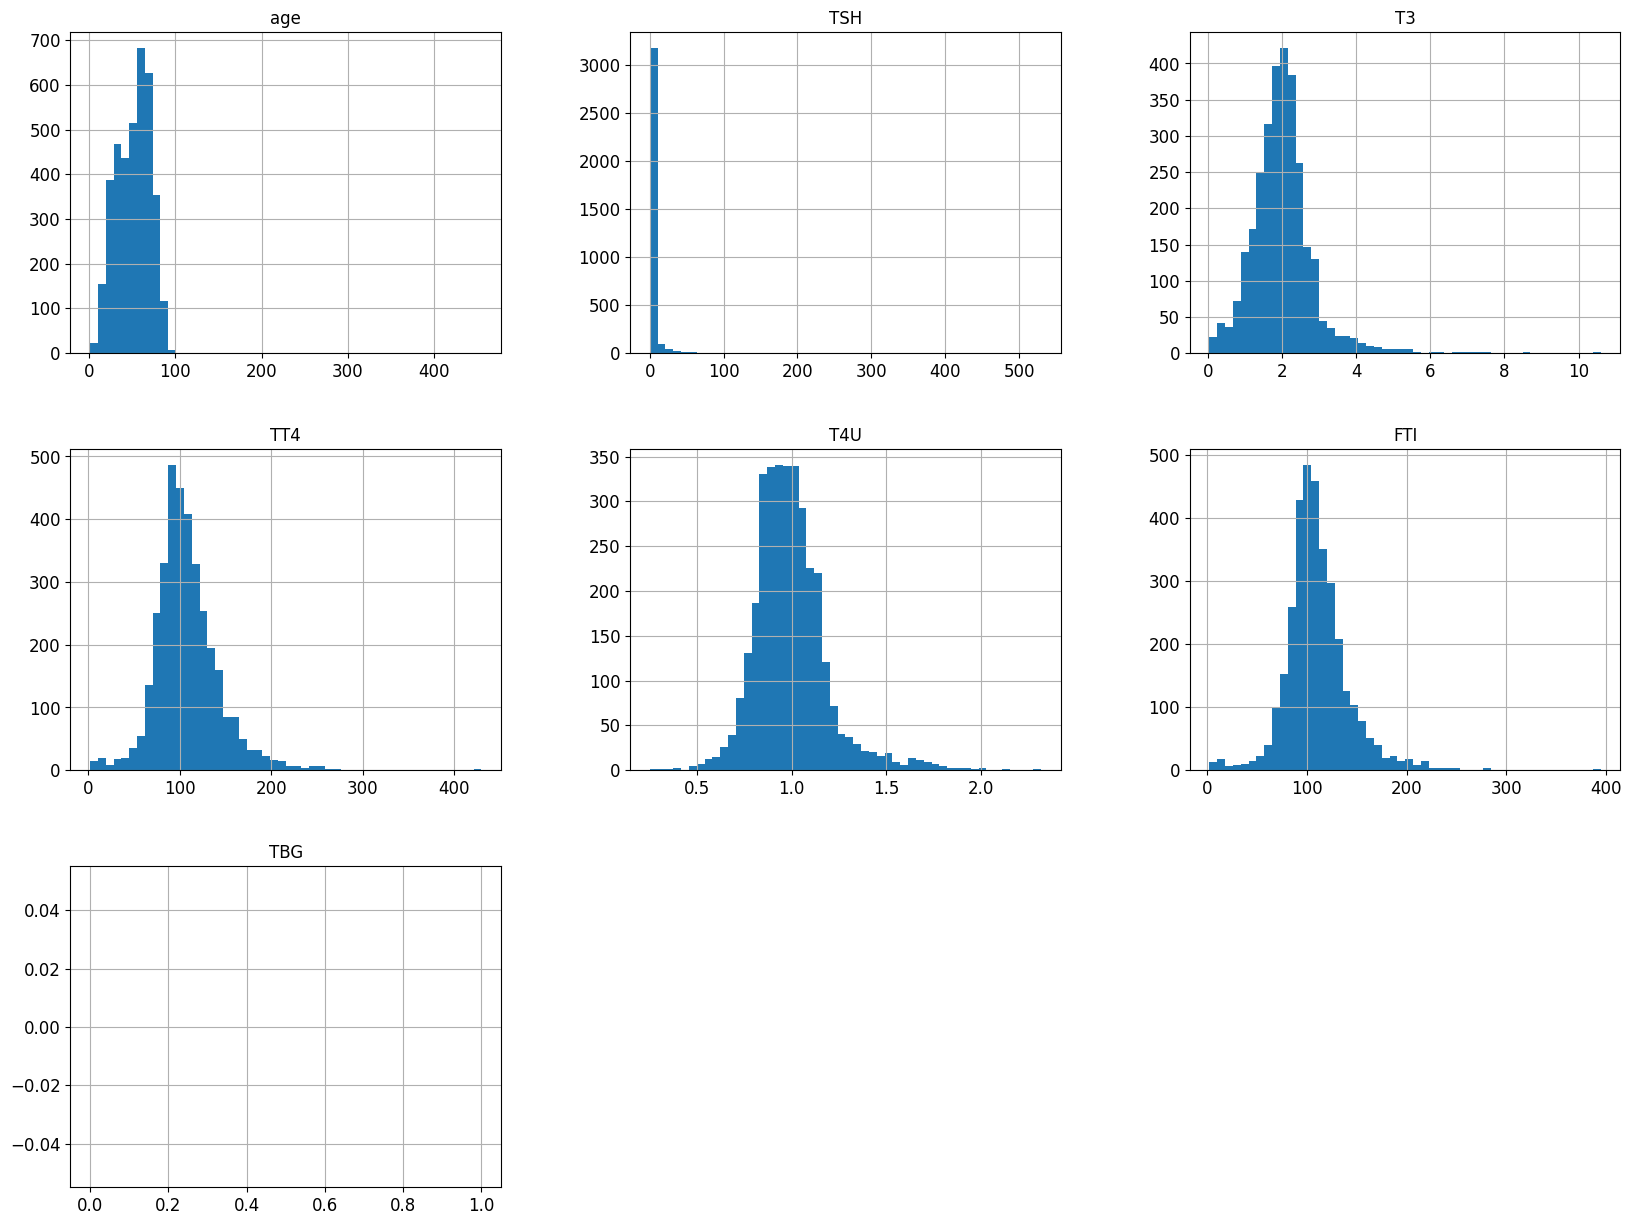

In [ ]:
dataset.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
#Some remarks :
   #we have some missing data with '?' values !
   #there is no values in TBG feature
   #the attributes have different scales

## Create a Test Set

In [ ]:
#we do have a quite large data so we shoose to use tran_test_split from sklearn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)


In [ ]:
print(test_set.shape)
test_set.head()

(755, 30)


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
93,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.300,t,2.2,t,103.0,t,1.35,t,76.0,f,NaN,other,negative
3772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2636,41.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.025,t,4.4,t,138.0,t,0.64,t,218.0,f,NaN,other,negative
1338,56.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.005,f,NaN,t,170.0,t,0.96,t,177.0,f,NaN,other,negative
358,57.0,M,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.620,t,1.5,t,74.0,t,0.78,t,96.0,f,NaN,other,negative


# Prepare the Data for Machine Learning Algorithms (Preprocessing)

In [ ]:
data=train_set.copy()
data.head(20)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
543,34.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.00,t,2.3,t,120.0,t,1.01,t,119.0,f,NaN,other,negative
1192,71.0,F,f,f,f,t,f,f,f,t,f,f,f,f,f,f,t,1.60,t,1.8,t,136.0,t,1.16,t,117.0,f,NaN,SVI,negative
3172,38.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.61,t,1.7,t,107.0,t,0.81,t,132.0,f,NaN,SVI,negative
761,73.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.2,t,145.0,t,1.34,t,108.0,f,NaN,other,negative
2955,32.0,F,t,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.01,t,2.3,t,147.0,t,0.75,t,198.0,f,NaN,SVI,negative
1670,61.0,F,f,f,f,t,f,f,f,f,f,f,f,f,f,f,t,11.00,t,1.2,t,83.0,t,1.01,t,82.0,f,NaN,other,negative
612,56.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,t,2.1,t,113.0,t,0.94,t,120.0,f,NaN,other,negative
2957,62.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.10,t,1.9,t,113.0,t,1.14,t,99.0,f,NaN,other,negative
2822,51.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,t,92.0,t,0.83,t,111.0,f,NaN,other,negative
1061,19.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.60,t,1.6,t,94.0,t,1.06,t,89.0,f,NaN,other,negative


In [ ]:
#let's see how missing values do we have in our data
data.isnull().sum()

age                             3
sex                           126
on_thyroxine                    2
query_on_thyroxine              2
on_antithyroid_medication       2
sick                            2
pregnant                        2
thyroid_surgery                 2
I131_treatment                  2
query_hypothyroid               2
query_hyperthyroid              2
lithium                         2
goitre                          2
tumor                           2
hypopituitary                   2
psych                           2
TSH_measured                    2
TSH                           295
T3_measured                     2
T3                            624
TT4_measured                    2
TT4                           191
T4U_measured                    2
T4U                           316
FTI_measured                    2
FTI                           314
TBG_measured                    2
TBG                          3020
referral_source                 2
Class         

In [ ]:
#
#1)as we can see there is a lot of missing values and 'TBG' Attribute have no values at all
#2)some features are not useful like 'T4U mesured''TSH mesured' .. because we have the values of these features
#so we can remove TBG feature and also the anuseful attributes
data.drop(['TBG','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis=1,inplace=True)

In [ ]:
data.head()
data.isnull().sum()

age                            3
sex                          126
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
sick                           2
pregnant                       2
thyroid_surgery                2
I131_treatment                 2
query_hypothyroid              2
query_hyperthyroid             2
lithium                        2
goitre                         2
tumor                          2
hypopituitary                  2
psych                          2
TSH                          295
T3                           624
TT4                          191
T4U                          316
FTI                          314
referral_source                2
Class                          2
dtype: int64

In [ ]:
#we still have some nan values,we can use an imputer
#but before that let's encode the column 'sex'
data.sex.replace({'M':1,'F':2},inplace=True)

from sklearn.impute import KNNImputer
imp=KNNImputer(n_neighbors=3)

round_Values = round(data.sex.mean())
data.sex.fillna(round_Values,inplace=True)

c=['sex','TSH','T3','TT4','T4U','FTI']
for i in c :
  data[i]=imp.fit_transform(data[[i]])

data.dropna(inplace=True) #still some little na to drop

In [ ]:
data.isnull().sum()
data['Class'].unique #we can delete the 3 rows in the bottom
data=data[:-3]
data['age'].dtype #here the age feature is detected as object values !
data['age'] = pd.to_numeric(data['age'])

<ipython-input-15-3b59d6cb4344>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = pd.to_numeric(data['age'])


In [ ]:
data['age'].dtype

dtype('float64')

## Visualizing Data

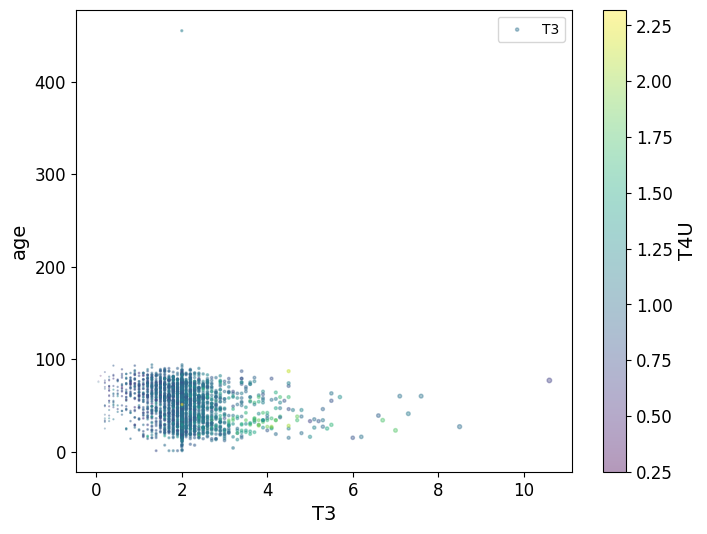

In [ ]:
data.plot(kind="scatter", x="T3", y="age",c="T4U",
             s=data['T3'], label="T3", alpha=0.4, figsize=(8,6))
plt.legend()

In [ ]:
#there is a big age value that we can consider as outlier,lest's detect which value
data_out = data[data['age']>130]
data_out
data=data.drop(index=1364,axis=0)

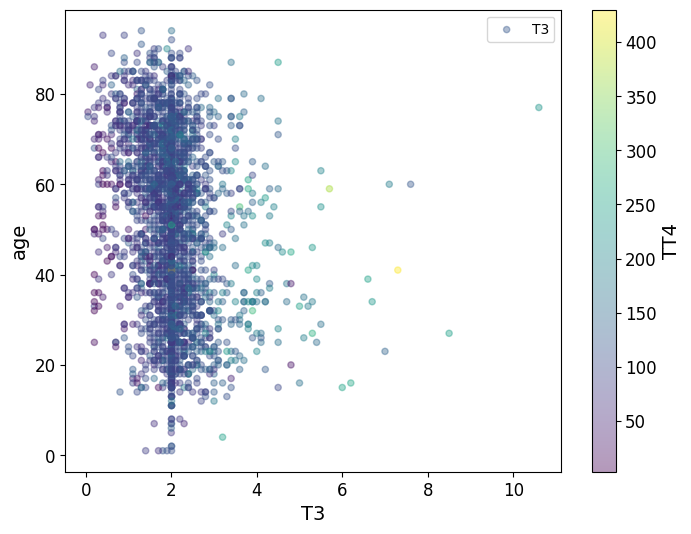

In [ ]:
#let's plot again
data.plot(kind="scatter", x="T3", y="age",c="TT4",
            label="T3", alpha=0.4, figsize=(8,6))
plt.legend()

## Find out Correlation

<ipython-input-20-1040de44c503>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

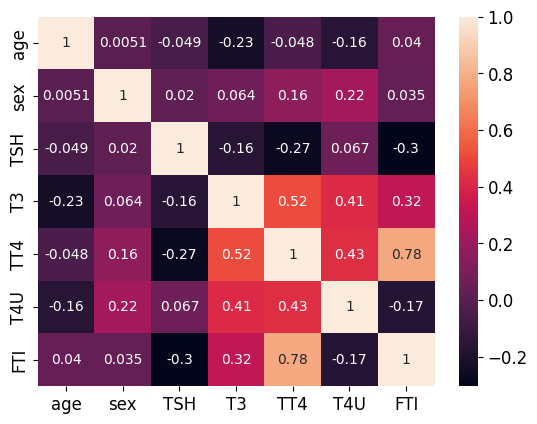

In [ ]:
#let's see correalation between
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

In [ ]:
#we can see a hight corr between TT4 and FTI,also FTI and T3 , T3 and TT4
data.corr()

<ipython-input-21-e17209174682>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,sex,TSH,T3,TT4,T4U,FTI
age,1.000000,0.005136,-0.049234,-0.228926,-0.048251,-0.162235,0.039866
sex,0.005136,1.000000,0.020091,0.063629,0.164042,0.223760,0.034922
TSH,-0.049234,0.020091,1.000000,-0.162537,-0.270476,0.067363,-0.303775
T3,-0.228926,0.063629,-0.162537,1.000000,0.515403,0.411899,0.317087
TT4,-0.048251,0.164042,-0.270476,0.515403,1.000000,0.428987,0.778984
T4U,-0.162235,0.223760,0.067363,0.411899,0.428987,1.000000,-0.171409
FTI,0.039866,0.034922,-0.303775,0.317087,0.778984,-0.171409,1.000000


## Handling Text and Categorical Attributes

Now let's preprocess the categorical data

In [ ]:
#we gonna use a encoder to transform categorical dat to numbers
from sklearn.preprocessing import OrdinalEncoder

cat_data=data.select_dtypes(include=['object'])
cat_data.head()


,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,referral_source,Class
543,f,f,f,f,f,f,f,f,f,f,f,f,f,f,other,negative
1192,f,f,f,t,f,f,f,t,f,f,f,f,f,f,SVI,negative
3172,f,f,f,f,f,f,f,f,f,f,f,f,f,f,SVI,negative
761,f,f,f,f,f,f,f,f,f,f,f,f,f,f,other,negative
2955,t,f,f,f,f,f,f,t,f,f,f,f,f,f,SVI,negative


In [ ]:
oe = OrdinalEncoder()
#data_encoded = ordinal_encoder.fit_transform(cat_data)
#data_encoded
for i in cat_data.columns :
  data[i]=oe.fit_transform(data[[i]])
data.tail(20)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
2391,59.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.100000,2.500000,100.000000,0.980000,103.000000,4.0,0.0
769,72.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,1.300000,91.000000,1.020000,89.000000,3.0,0.0
3380,67.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.700000,1.800000,143.000000,0.870000,164.000000,3.0,0.0
1685,68.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.580000,2.005902,150.000000,1.030000,146.000000,4.0,0.0
130,29.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600000,2.005902,140.000000,1.410000,99.000000,4.0,0.0
3735,59.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,2.100000,78.000000,0.820000,95.000000,4.0,0.0
2919,69.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.658767,2.005902,108.694521,0.994591,110.821619,4.0,0.0
3171,18.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.200000,2.005902,78.000000,0.770000,102.000000,3.0,0.0
3444,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.400000,1.000000,99.000000,0.700000,142.000000,3.0,1.0
2135,44.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.400000,2.400000,112.000000,1.010000,111.000000,4.0,0.0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'on_thyroxine'}>,
        <Axes: title={'center': 'query_on_thyroxine'}>,
        <Axes: title={'center': 'on_antithyroid_medication'}>],
       [<Axes: title={'center': 'sick'}>,
        <Axes: title={'center': 'pregnant'}>,
        <Axes: title={'center': 'thyroid_surgery'}>,
        <Axes: title={'center': 'I131_treatment'}>,
        <Axes: title={'center': 'query_hypothyroid'}>],
       [<Axes: title={'center': 'query_hyperthyroid'}>,
        <Axes: title={'center': 'lithium'}>,
        <Axes: title={'center': 'goitre'}>,
        <Axes: title={'center': 'tumor'}>,
        <Axes: title={'center': 'hypopituitary'}>],
       [<Axes: title={'center': 'psych'}>,
        <Axes: title={'center': 'TSH'}>, <Axes: title={'center': 'T3'}>,
        <Axes: title={'center': 'TT4'}>, <Axes: title={'center': 'T4U'}>],
       [<Axes: title={'center': 'FTI'}>,
        <Axes: title={'center': 're

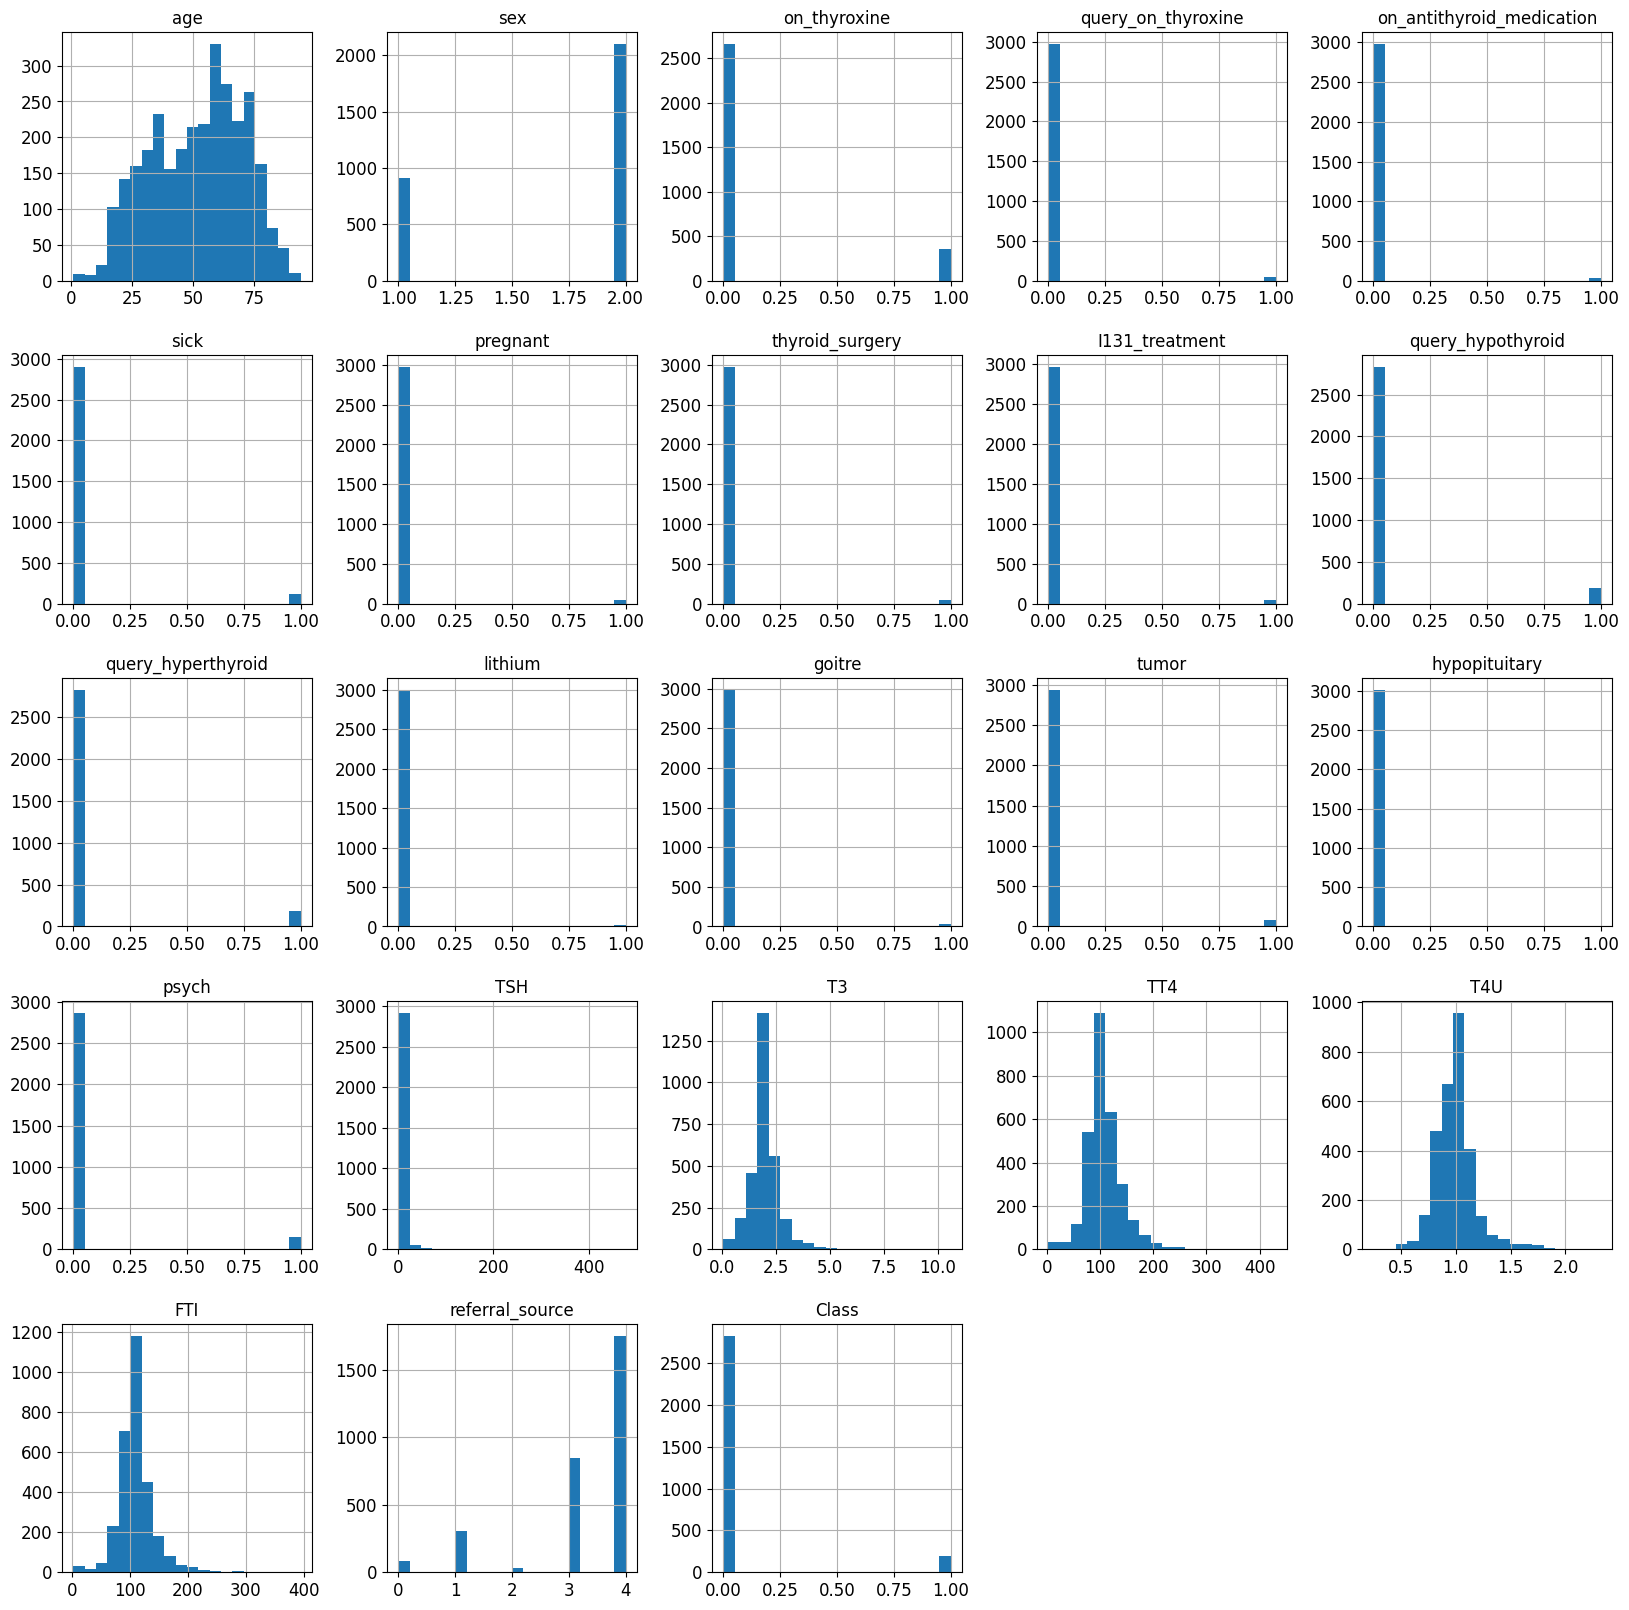

In [ ]:
data.hist(bins=20,figsize=(20,20))

## Transformation Pipelines

Here we try to add techniques we used before to use it on test set and upcoming data

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#data_to_scale=data.drop(columns={"Class","hypopituitary","psych","tumor","goitre","lithium","query_hyperthyroid"})
full_pipe = Pipeline([
    ('oe',OrdinalEncoder()),
    ('imp', SimpleImputer()),
    ('scaler',MinMaxScaler())
 ])
data_scaled = pd.DataFrame(full_pipe.fit_transform(data))



# Select and Train a Model

## Training and Evaluating on the Training Set

In [ ]:
#let's fix our X and y data
X_train=data.drop(columns='Class')
y_train=data['Class']
print(X_train.shape)
print(y_train.shape)


(3013, 22)
(3013,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Dc_tree = DecisionTreeClassifier(max_depth=3)
dt_clf = Dc_tree.fit(X_train,y_train)
dt_clf

DecisionTreeClassifier(max_depth=3)

Compare against the actual values:

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = data.iloc[:20]
some_data=some_data.drop(columns='Class')
some_labels = data.iloc[:20]
#some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", dt_clf.predict(some_data)) #Predictions
print("Labels:",data['Class'].head(20)) #data values

Predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Labels: 543     0.0
1192    0.0
3172    0.0
761     0.0
2955    0.0
1670    0.0
612     0.0
2957    0.0
2822    0.0
1061    0.0
485     0.0
2186    0.0
3324    0.0
1116    1.0
258     0.0
386     0.0
1270    0.0
3554    0.0
1616    0.0
2711    0.0
Name: Class, dtype: float64


In [ ]:
from sklearn.metrics import accuracy_score
dt_clf.score(X_train,y_train)

0.9844009293063392

## Better Evaluation Using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel="sigmoid")
svc_scores = cross_val_score(svc, X_train, y_train,scoring="accuracy", cv=10)
display_scores(svc_scores)

Scores: [0.93708609 0.93708609 0.93708609 0.94019934 0.93687708 0.93687708
 0.93687708 0.93687708 0.93687708 0.93687708]
Mean: 0.9372720072165629


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
reg_scores = cross_val_score(lr, X_train, y_train,scoring="accuracy", cv=10)
display_scores(reg_scores)

Scores: [0.97019868 0.97682119 0.94701987 0.96345515 0.96345515 0.95348837
 0.97009967 0.95348837 0.95016611 0.96677741]
Mean: 0.9614969967657478


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2,n_estimators=200,random_state=42)
rf_scores = cross_val_score(rf, X_train, y_train,scoring="accuracy", cv=10)
display_scores(rf_scores)

Scores: [0.93708609 0.93708609 0.93708609 0.94019934 0.93687708 0.93687708
 0.93687708 0.93687708 0.93687708 0.93687708]
Mean: 0.9372720072165629


# Fine-Tune Your Model

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_depth': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [200, 300], 'max_depth': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_depth': [2, 3, 4],
                          'n_estimators': [200, 300]}],
             return_train_score=True, scoring='accuracy')

The best hyperparameter combination found:

In [ ]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'max_depth': 2, 'n_estimators': 3}
nan {'max_depth': 2, 'n_estimators': 10}
nan {'max_depth': 2, 'n_estimators': 30}
nan {'max_depth': 4, 'n_estimators': 3}
nan {'max_depth': 4, 'n_estimators': 10}
nan {'max_depth': 4, 'n_estimators': 30}
nan {'max_depth': 6, 'n_estimators': 3}
nan {'max_depth': 6, 'n_estimators': 10}
nan {'max_depth': 6, 'n_estimators': 30}
nan {'max_depth': 8, 'n_estimators': 3}
nan {'max_depth': 8, 'n_estimators': 10}
nan {'max_depth': 8, 'n_estimators': 30}
nan {'bootstrap': False, 'max_depth': 2, 'n_estimators': 200}
nan {'bootstrap': False, 'max_depth': 2, 'n_estimators': 300}
nan {'bootstrap': False, 'max_depth': 3, 'n_estimators': 200}
nan {'bootstrap': False, 'max_depth': 3, 'n_estimators': 300}
nan {'bootstrap': False, 'max_depth': 4, 'n_estimators': 200}
nan {'bootstrap': False, 'max_depth': 4, 'n_estimators': 300}


<ipython-input-38-4ec637f9de24>:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)


In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009767,0.001379,0.002763,0.000172,2,3,NaN,"{'max_depth': 2, 'n_estimators': 3}",0.936982,0.936982,0.936982,0.938538,0.936877,0.937272,0.000634,14,0.937344,0.937344,0.937344,0.936956,0.937370,0.937272,0.000158
1,0.025744,0.004208,0.003474,0.000048,2,10,NaN,"{'max_depth': 2, 'n_estimators': 10}",0.936982,0.936982,0.936982,0.938538,0.936877,0.937272,0.000634,14,0.937344,0.937344,0.937344,0.936956,0.937370,0.937272,0.000158
2,0.064115,0.002266,0.005546,0.000490,2,30,NaN,"{'max_depth': 2, 'n_estimators': 30}",0.936982,0.936982,0.936982,0.938538,0.936877,0.937272,0.000634,14,0.937344,0.937344,0.937344,0.936956,0.937370,0.937272,0.000158
3,0.010409,0.000572,0.002833,0.000054,4,3,NaN,"{'max_depth': 4, 'n_estimators': 3}",0.946932,0.945274,0.956882,0.931894,0.940199,0.944236,0.008209,11,0.957261,0.951867,0.959751,0.941933,0.945251,0.951213,0.006806
4,0.026596,0.001712,0.003608,0.000151,4,10,NaN,"{'max_depth': 4, 'n_estimators': 10}",0.960199,0.953566,0.955224,0.946844,0.948505,0.952867,0.004798,10,0.965560,0.959751,0.960166,0.947325,0.951058,0.956772,0.006626
5,0.069609,0.001178,0.005810,0.001139,4,30,NaN,"{'max_depth': 4, 'n_estimators': 30}",0.961857,0.955224,0.948590,0.961794,0.948505,0.955194,0.005938,8,0.969295,0.964315,0.959751,0.976358,0.958109,0.965566,0.006654
6,0.010848,0.001068,0.002810,0.000081,6,3,NaN,"{'max_depth': 6, 'n_estimators': 3}",0.975124,0.963516,0.970149,0.963455,0.940199,0.962489,0.011976,6,0.980498,0.979668,0.969295,0.977603,0.963501,0.974113,0.006628
7,0.028461,0.002260,0.003688,0.000085,6,10,NaN,"{'max_depth': 6, 'n_estimators': 10}",0.980100,0.978441,0.975124,0.976744,0.975083,0.977098,0.001944,4,0.985892,0.986307,0.982988,0.987972,0.986313,0.985894,0.001619
8,0.100499,0.021452,0.008344,0.002672,6,30,NaN,"{'max_depth': 6, 'n_estimators': 30}",0.981758,0.975124,0.983416,0.978405,0.983389,0.980419,0.003215,2,0.989627,0.991286,0.991286,0.992119,0.990460,0.990956,0.000847
9,0.018039,0.001397,0.004182,0.000249,8,3,NaN,"{'max_depth': 8, 'n_estimators': 3}",0.975124,0.950249,0.980100,0.970100,0.968439,0.968802,0.010136,5,0.988797,0.971369,0.983402,0.994193,0.988801,0.985313,0.007762


## Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_depth': randint(low=1, high=8),
    }

forest_reg = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a0aac7c7040>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a0aac7c4580>},
                   random_state=42, scoring='accuracy')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'max_depth': 7, 'n_estimators': 180}
nan {'max_depth': 5, 'n_estimators': 15}
nan {'max_depth': 3, 'n_estimators': 72}
nan {'max_depth': 5, 'n_estimators': 21}
nan {'max_depth': 7, 'n_estimators': 122}
nan {'max_depth': 3, 'n_estimators': 75}
nan {'max_depth': 3, 'n_estimators': 88}
nan {'max_depth': 5, 'n_estimators': 100}
nan {'max_depth': 3, 'n_estimators': 150}
nan {'max_depth': 5, 'n_estimators': 2}


<ipython-input-41-8f81059836be>:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)


## Analyze the Best Models and get the feature importance via Random forest

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.75773670e-02, 8.48923440e-03, 6.29864794e-03, 1.99860969e-03,
       1.54693543e-06, 8.55417691e-03, 2.16396995e-06, 9.28023541e-05,
       1.10620541e-03, 7.47231034e-03, 2.96422459e-03, 8.27675925e-04,
       8.37067152e-04, 5.68162544e-04, 1.30240402e-03, 3.51684867e-03,
       6.42069462e-02, 5.19248780e-01, 9.13615908e-02, 8.13696569e-02,
       8.42484714e-02, 5.79551067e-02])

In [ ]:
#Display the features importance by names
attributes = data.columns
sorted(zip(feature_importances, attributes), reverse=True)

[(0.5192487801888865, 'T3'),
 (0.09136159077498368, 'TT4'),
 (0.08424847137545645, 'FTI'),
 (0.08136965689386852, 'T4U'),
 (0.06420694619875914, 'TSH'),
 (0.05795510673656409, 'referral_source'),
 (0.05757736699261005, 'age'),
 (0.008554176909409489, 'sick'),
 (0.008489234398077201, 'sex'),
 (0.0074723103368913675, 'query_hypothyroid'),
 (0.006298647938180218, 'on_thyroxine'),
 (0.00351684867000924, 'psych'),
 (0.0029642245903689288, 'query_hyperthyroid'),
 (0.0019986096887991546, 'query_on_thyroxine'),
 (0.0013024040194237348, 'hypopituitary'),
 (0.0011062054074227575, 'I131_treatment'),
 (0.000837067151605352, 'goitre'),
 (0.0008276759251644929, 'lithium'),
 (0.0005681625440016844, 'tumor'),
 (9.280235413847314e-05, 'thyroid_surgery'),
 (2.1639699512729702e-06, 'pregnant'),
 (1.5469354281515274e-06, 'on_antithyroid_medication')]

## Evaluate Your System on the Test Set

In [ ]:
test_set.dropna()
#test_set=test_set.drop(columns=['TBG','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis=0,inplace=False)
test_set.sex.replace({'M':1,'F':2},inplace=True)
test_set.dropna()
#test_set=test_set.drop(index=3772,axis=0)
for i in test_set.columns :
  test_set[i]=oe.fit_transform(test_set[[i]])
  test_set[i]=imp.fit_transform(test_set[[i]])
test_set.isna().sum()


age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral_source              0
Class                        0
dtype: int64

In [ ]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("Class", axis=1)
y_test = test_set["Class"].copy()

#X_test_prepared = pipe.transform(X_test)
final_predictions = final_model.predict(X_test)

final_accuracy = final_model.score(X_test,y_test)



0.9456233421750663

In [ ]:
final_accuracy

0.9456233421750663

We can compute a 94% confidence interval for the test accuracy:

# Project Deployment

We can use joblib to load the model to a website

In [ ]:
my_model = final_model

In [ ]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF